In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('./minibook-2nd-code/chapter2/data/nyc_data.csv', 
                  parse_dates= ['pickup_datetime','dropoff_datetime'])


In [4]:
pickup = data[['pickup_longitude', 'pickup_latitude']].values
dropoff = data[['dropoff_longitude', 'dropoff_latitude']].values
print(pickup, dropoff)

[[-73.955925  40.781887]
 [-74.005501  40.745735]
 [-73.969955  40.79977 ]
 ..., 
 [-73.993492  40.729347]
 [-73.978477  40.772945]
 [-73.987206  40.750568]] [[-73.963181  40.777832]
 [-73.964943  40.755722]
 [-73.954567  40.787392]
 ..., 
 [-74.013725  40.702332]
 [-73.963814  40.773922]
 [-73.970909  40.795815]]


In [5]:
pickup[3,1] # 3,1 좌표의 값

40.755080999999997

In [6]:
pickup[1:7:2, 1:]  # [1,1], [3,1], [5,1] 값이다
# 즉 1:7:2는 1에서 7-1까지 2씩 건너뛰면서 x 인덱스를 설정하라는 것이고
# 1: 는 1:n:1이라는 말로 1에서 끝까지 1씩 증가하면서 y 인덱스를 설정하라는 것이다.

array([[ 40.745735],
       [ 40.755081],
       [ 40.768978]])

In [7]:
lon = pickup[:, 0]
lat = pickup[:, 1]

In [8]:
lon_min, lon_max = (-73.98330, -73.98025)
lat_min, lat_max = (40.76724, 40.76871)

In [9]:
in_lon = (lon_min <=lon) & (lon <= lon_max)

In [10]:
in_lon.sum()  # 배열중 True의 갯수

69163

In [11]:
in_lat = (lat_min <= lat) & (lat <= lat_max)
in_lonlat = in_lon & in_lat
in_lonlat.sum()

3998

In [12]:
np.nonzero(in_lonlat)[0]

array([   901,   1011,   1066, ..., 845749, 845903, 846080], dtype=int64)

In [13]:
lon1, lat1 = dropoff.T

In [14]:
print(in_lonlat)

[False False False ..., False False False]


In [15]:
EARTH_R = 6372.8  # 지구 반지름?
def geo_distance(lon0, lat0, lon1, lat1):
    """ 지리적 좌표로 두 점간의 거리를 km로 반환한다 """
    # from: http://en.wikipedia.org/wiki/Great-circle_distance
    # http://stackoverflow.com/a/8859667/1595060
    
    lat0 = np.radians(lat0)
    lon0 = np.radians(lon0)
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    dlon = lon0 - lon1
    y = np.sqrt(
        (np.cos(lat1) * np.sin(dlon)) ** 2
        + (np.cos(lat0) * np.sin(lat1)
        - np.sin(lat0) * np.cos(lat1) * np.cos(dlon)) ** 2)
    x = np.sin(lat0) * np.sin(lat1) + \
        np.cos(lat0) * np.cos(lat1) * np.cos(dlon)
    c = np.arctan2(y, x)
    return EARTH_R * c

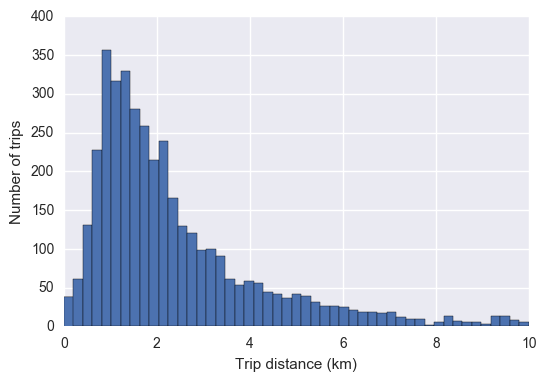

In [16]:
distance = geo_distance(lon, lat, lon1, lat1)
plt.hist(distance[in_lonlat], np.linspace(0., 10., 50))
plt.xlabel("Trip distance (km)")
plt.ylabel("Number of trips")

In [17]:
evening = (data.pickup_datetime.dt.hour >= 19).values
n = np.sum(evening)
n

242818

In [18]:
evening

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [29]:
weights = np.zeros(2 * n)
weights[:n] = -1  # 0번째 행
weights[n:] = +1  # 1번째 행

In [30]:
points = np.r_[pickup[evening],
               dropoff[evening]]

In [31]:
points.shape

(485636, 2)

In [32]:
points

array([[-73.98777 ,  40.754818],
       [-73.987312,  40.72242 ],
       [-73.975311,  40.787891],
       ..., 
       [-74.013725,  40.702332],
       [-73.963814,  40.773922],
       [-73.970909,  40.795815]])

In [33]:
def lat_lon_to_pixels(lat, lon):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan(lat_rad + np.pi / 2.0) / 2.0)
    x = 100 * (lon + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)



In [24]:
lon, lat = points.T
x, y = lat_lon_to_pixels(lat, lon)
print(lon,lat,x,y)

[-73.98777  -73.987312 -73.975311 ..., -74.013725 -73.963814 -73.970909] [ 40.754818  40.72242   40.787891 ...,  40.702332  40.773922  40.795815] [ 29.44784167  29.44796889  29.4513025  ...,  29.44063194  29.45449611
  29.45252528] [ nan  nan  nan ...,  nan  nan  nan]


In [25]:
lon_min, lat_min = -74.0214, 40.6978
lon_max, lat_max = -73.9524, 40.7982
x_min, y_min = lat_lon_to_pixels(lat_min, lon_min)
x_max, y_max = lat_lon_to_pixels(lat_max, lon_max)
print(x_min, x_max, y_min, y_max)
bin = .00003
bins_x = np.arange(x_min, x_max, bin)
bins_y = np.arange(y_min, y_max, bin)

29.4385 29.457666666666668 nan nan


In [26]:
bins_y

array([], dtype=float64)

In [27]:
grid, _, _ = np.histogram2d(y, x, bins=(bins_y, bins_x), weights=weights)

ValueError: bins must have non-zero length

In [ ]:
grid, _, _ = np.histogram2d(y, x, weights=weights,
                            bins=(bins_y, bins_x))